### Importing all the packages

## Things to do 
-  Make histograms of the variables IMPORTANT
-  Combine unique variables with lower count
-  Combine 1st and 2nd floor into total area
-  make a dummy variable showing if the house has a second floor or not
-  remove square terms
-  remove outliers
-  make the code cleaner
-  make a age section for the house at the time of sales
-  select your variables again
-  group features with lower observation


In [201]:
# Libraries that we are using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import math

## Importing the data files

In [202]:
#importing the training and testing data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
data = [train, test]

## Checking for missing files

In [203]:
#looking at missing values from the training data
train.loc[:, :].isnull().sum().loc[train.loc[:, :].isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [204]:
#looking at missing values from the testing data
test.loc[:, :].isnull().sum().loc[test.loc[:, :].isnull().sum()>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

## imputing the missing values

In [205]:
#creating a new column called hasLotFrontage. 1 will indicate it has frontage
for i in data:
    i["LotFrontage"].fillna(0, inplace = True)
    i["GarageArea"].fillna(0, inplace=True)
    i["GarageType"].fillna("NoGarage", inplace = True)
    i["Fence"].fillna("NoFence", inplace = True)
    i["GarageFinish"].fillna("NoGarage", inplace = True)
    i["GarageCars"].fillna(0, inplace=True)
    i["GarageYrBlt"].fillna(1900, inplace=True)
    i["TotalBsmtSF"].fillna(0, inplace = True)
    i["SaleType"].fillna(i["SaleType"].mode, inplace = True)
    i["MiscFeature"].fillna("NoFeatures", inplace = True)
    i["TotalBsmtSF"].fillna(i["TotalBsmtSF"].median(), inplace=True)
    i["hasLotFrontage"]= 0
    i["BsmtFullBath"].fillna(0, inplace = True)
    i["BsmtHalfBath"].fillna(0, inplace=True)
    i.loc[i["LotFrontage"]>0, "hasLotFrontage"] = 1
    i["BsmtQual"].fillna("No_bsmt", inplace = True)
    i["Alley"].fillna("No_Alley", inplace = True)
    i["hasWood"] = 0
    i.loc[i["WoodDeckSF"]>0, "hasWood"] = 1
    i["TotalPorchSF"] = i["OpenPorchSF"] + i["EnclosedPorch"]+i["3SsnPorch"]+i["ScreenPorch"]
    i["SaleT"] = "Oth"
    i.loc[i["SaleType"]=='New', "SaleT"] = "New"
    i.loc[(i["SaleType"] == "WD") | (i["SaleType"] == "CWD"), "SaleT"] = "WD"


In [206]:
#imputing the missing mszoning value
for i in data:
    i.loc[i["MSZoning"].isnull()&(i["Neighborhood"].str.match("IDOTRR")), "MSZoning"] = train.loc[train["Neighborhood"].str.match("IDOTRR"), "MSZoning"].mode()[0]
    i.loc[i["MSZoning"].isnull()&(i["Neighborhood"].str.match("Mitchel")), "MSZoning"] = train.loc[train["Neighborhood"].str.match("Mitchel"), "MSZoning"].mode()[0]
    

In [207]:
for i in data:
    i["hasRemod"] = 0
    i.loc[i["YearBuilt"]==i["YearRemodAdd"], "hasRemod"] = 1


In [208]:
for i in data:
    i["hasPool"] = 0
    i.loc[i["PoolArea"]>0, "hasPool"]= 1

In [209]:
for i in data:
    i["Extra_Condition"] = 0;
    for j in ["Condition1", "Condition2"]:
        i.loc[~(i[j].str.match("Norm")), "Extra_Condition"]=1


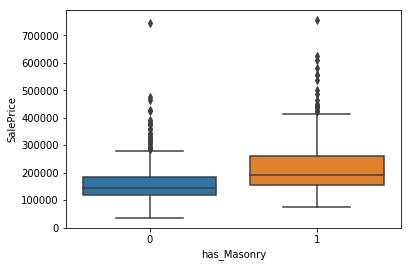

In [210]:
for i in data:
    i["has_Masonry"] = 0
    i.loc[i["MasVnrArea"]>0, "has_Masonry"] = 1
sns.boxplot(data = train, x= "has_Masonry", y = "SalePrice")

## Data Analysis

C:\Users\Ashim\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


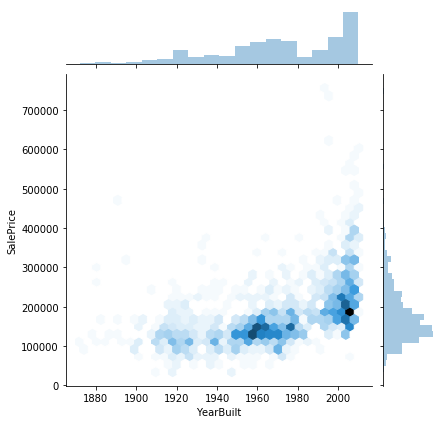

In [11]:
#seeing relationships between data
sns.jointplot(data = train, x= "YearBuilt", y = "SalePrice", kind = 'hex')
# sns.jointplot(data = train, x= "MSZoning", y = "SalePrice", kind = 'hex')


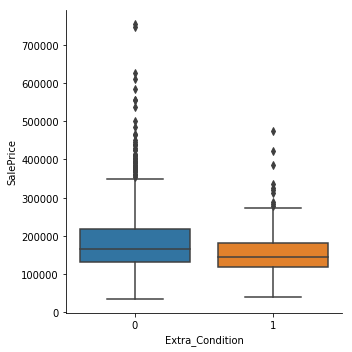

In [12]:
# train.loc[:, ["Condition1", "Condition2", "Extra_Condition"]]
sns.catplot(data = train, x = "Extra_Condition",y = "SalePrice", kind = "box")

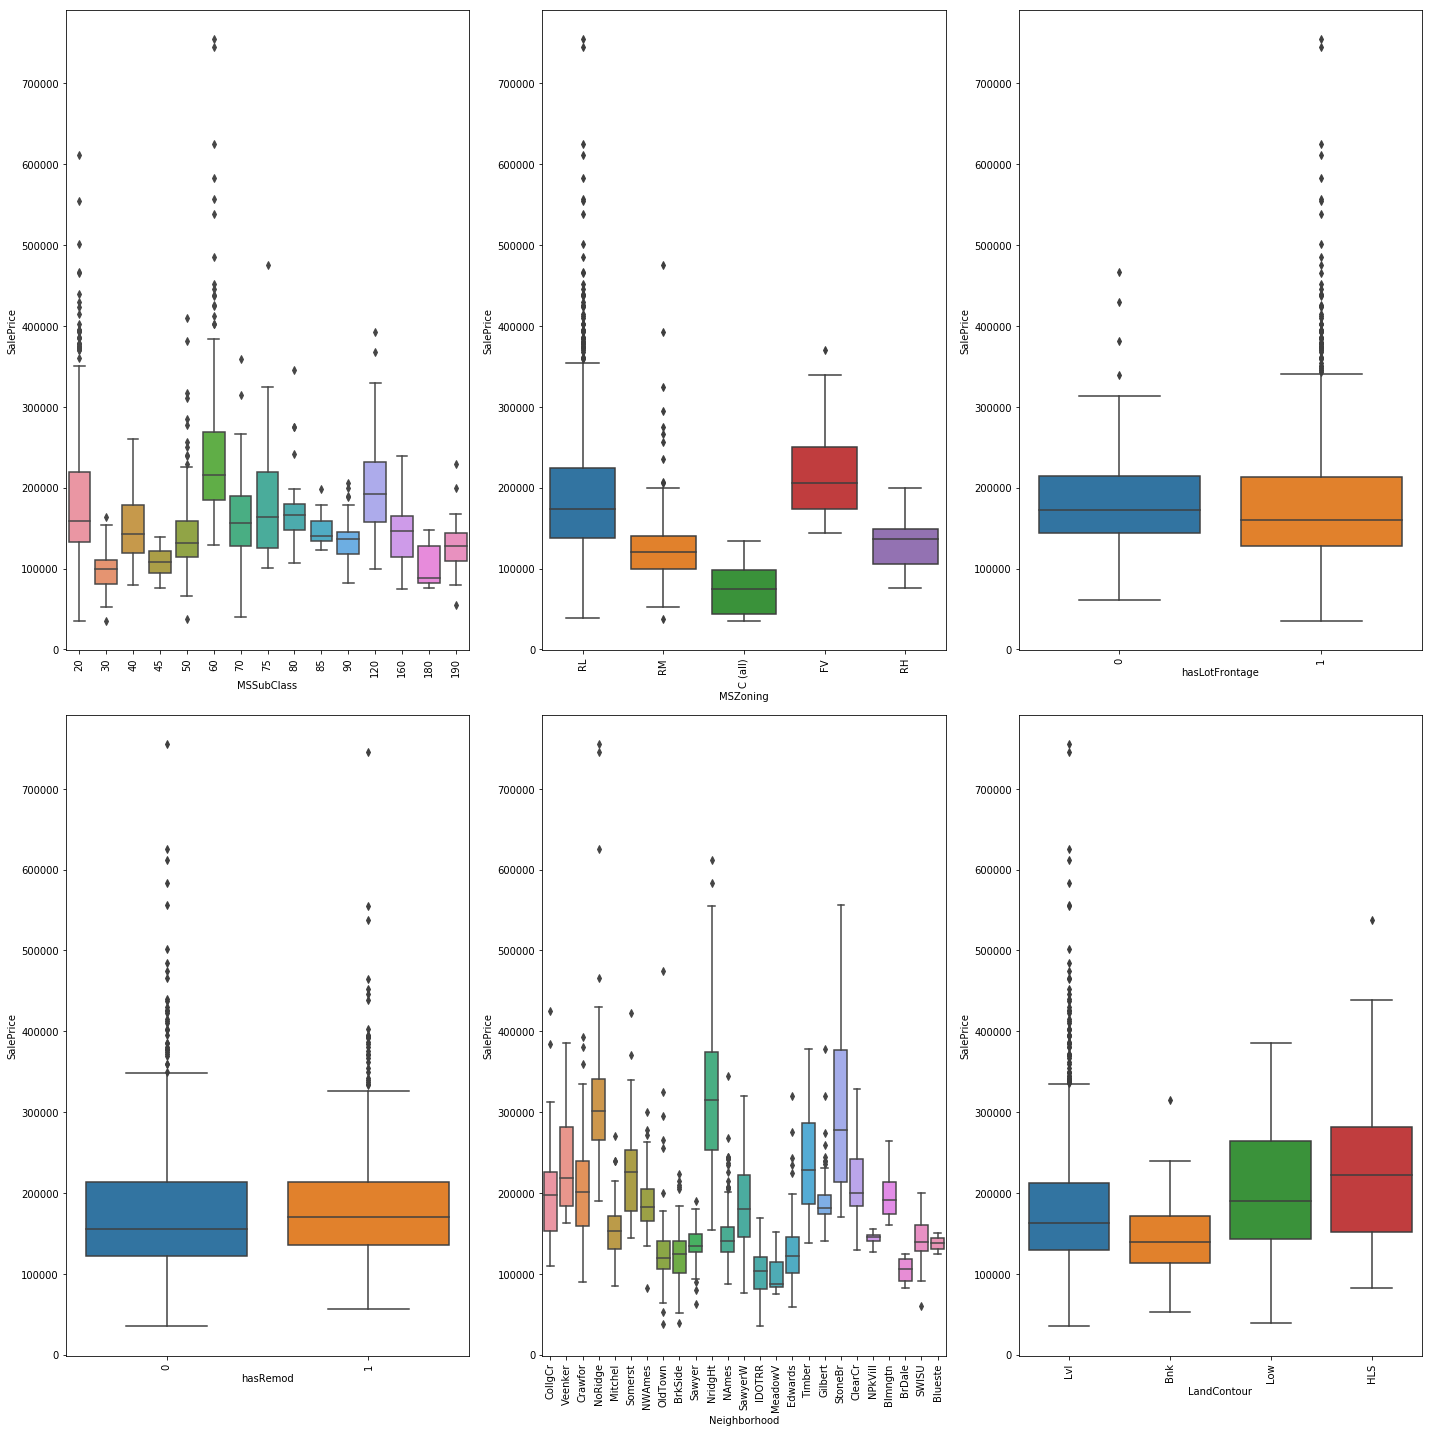

In [13]:
_check = ["MSSubClass", "MSZoning", "hasLotFrontage", "hasRemod","Neighborhood", "LandContour"]#, "Alley", "Street", "LotShape", "Utilities", "LotConfig", "LandSlope", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond"]
j = 1

for i in _check:
    plt.subplot(2, 3, j)
    ax = sns.boxplot(data = train, x = i, y = "SalePrice")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#     plt.gca().xticks(rotation = 90)
    j+=1;
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.tight_layout()

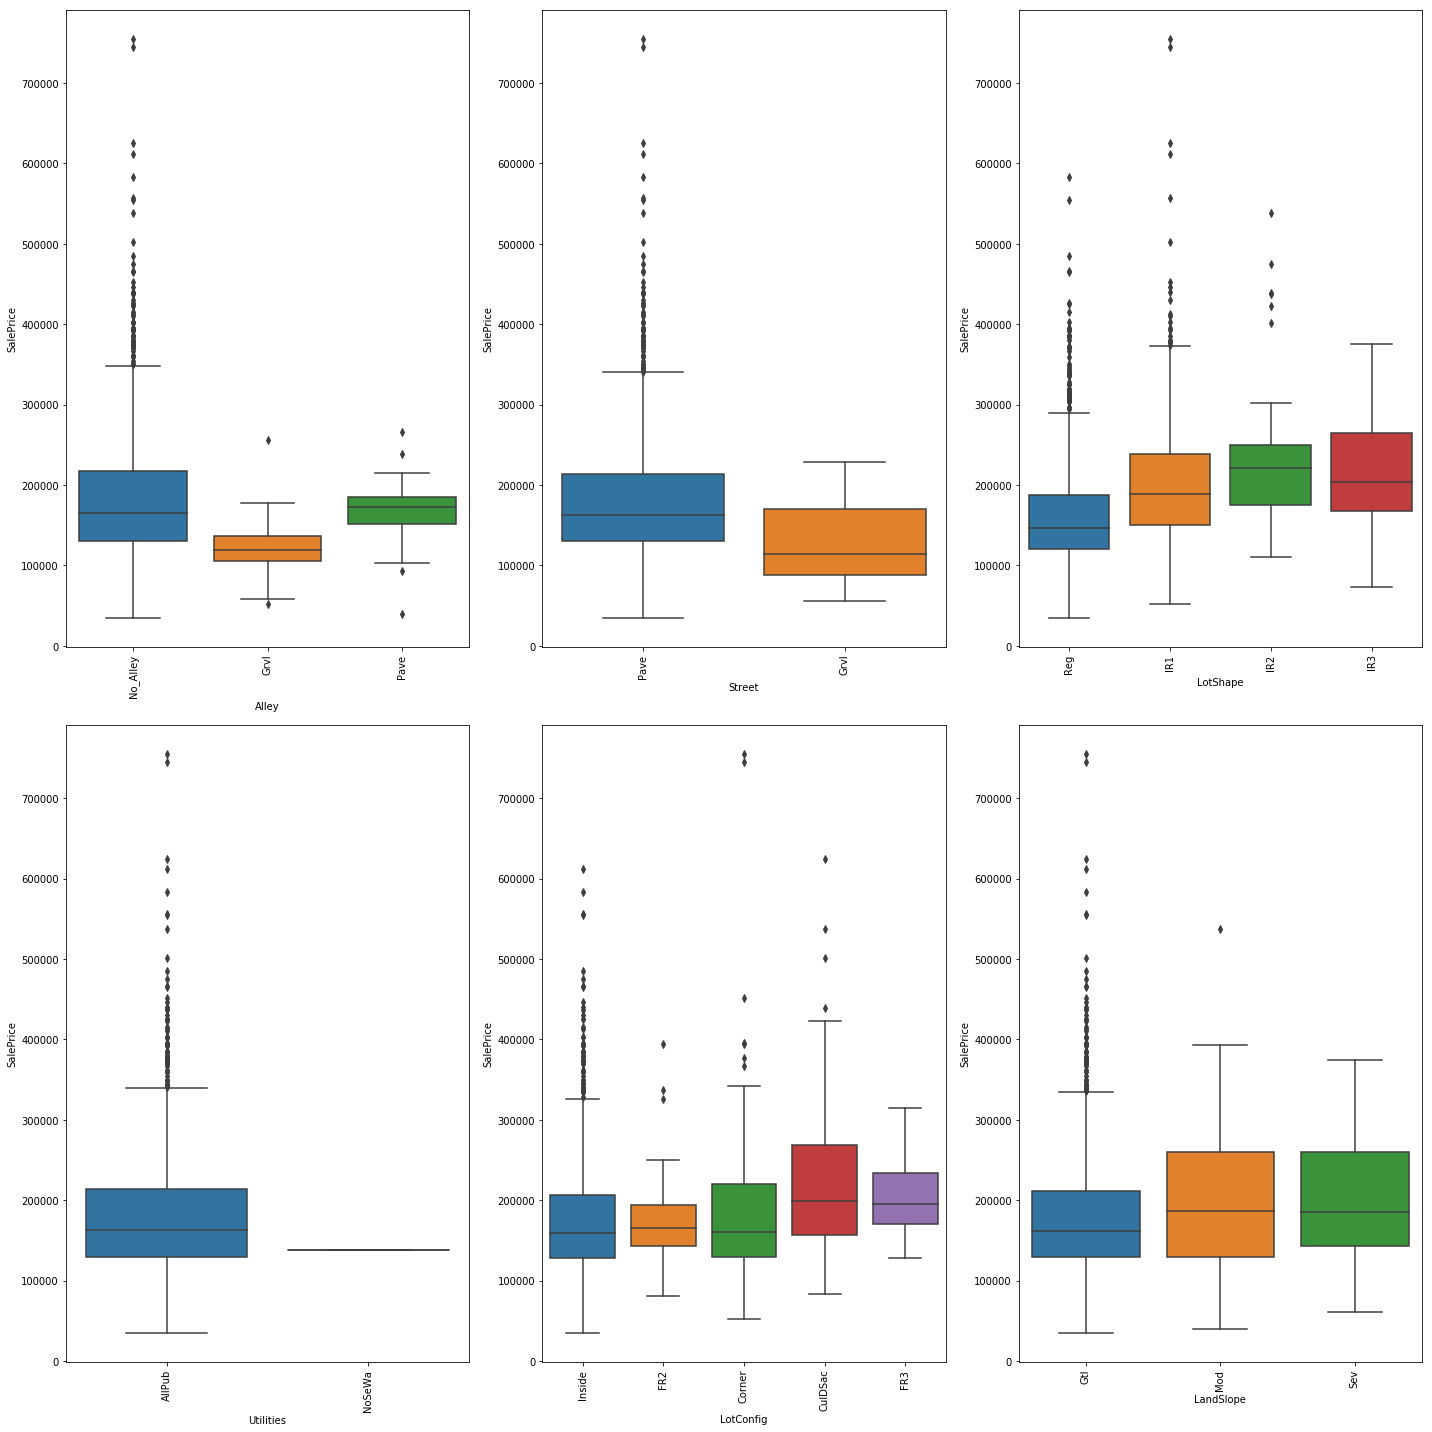

In [14]:
_check = ["Alley", "Street", "LotShape", "Utilities", "LotConfig", "LandSlope"]#, "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond"]
j = 1

for i in _check:
    plt.subplot(2, 3, j)
    ax = sns.boxplot(data = train, x = i, y = "SalePrice")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#     plt.gca().xticks(rotation = 90)
    j+=1;
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.tight_layout()

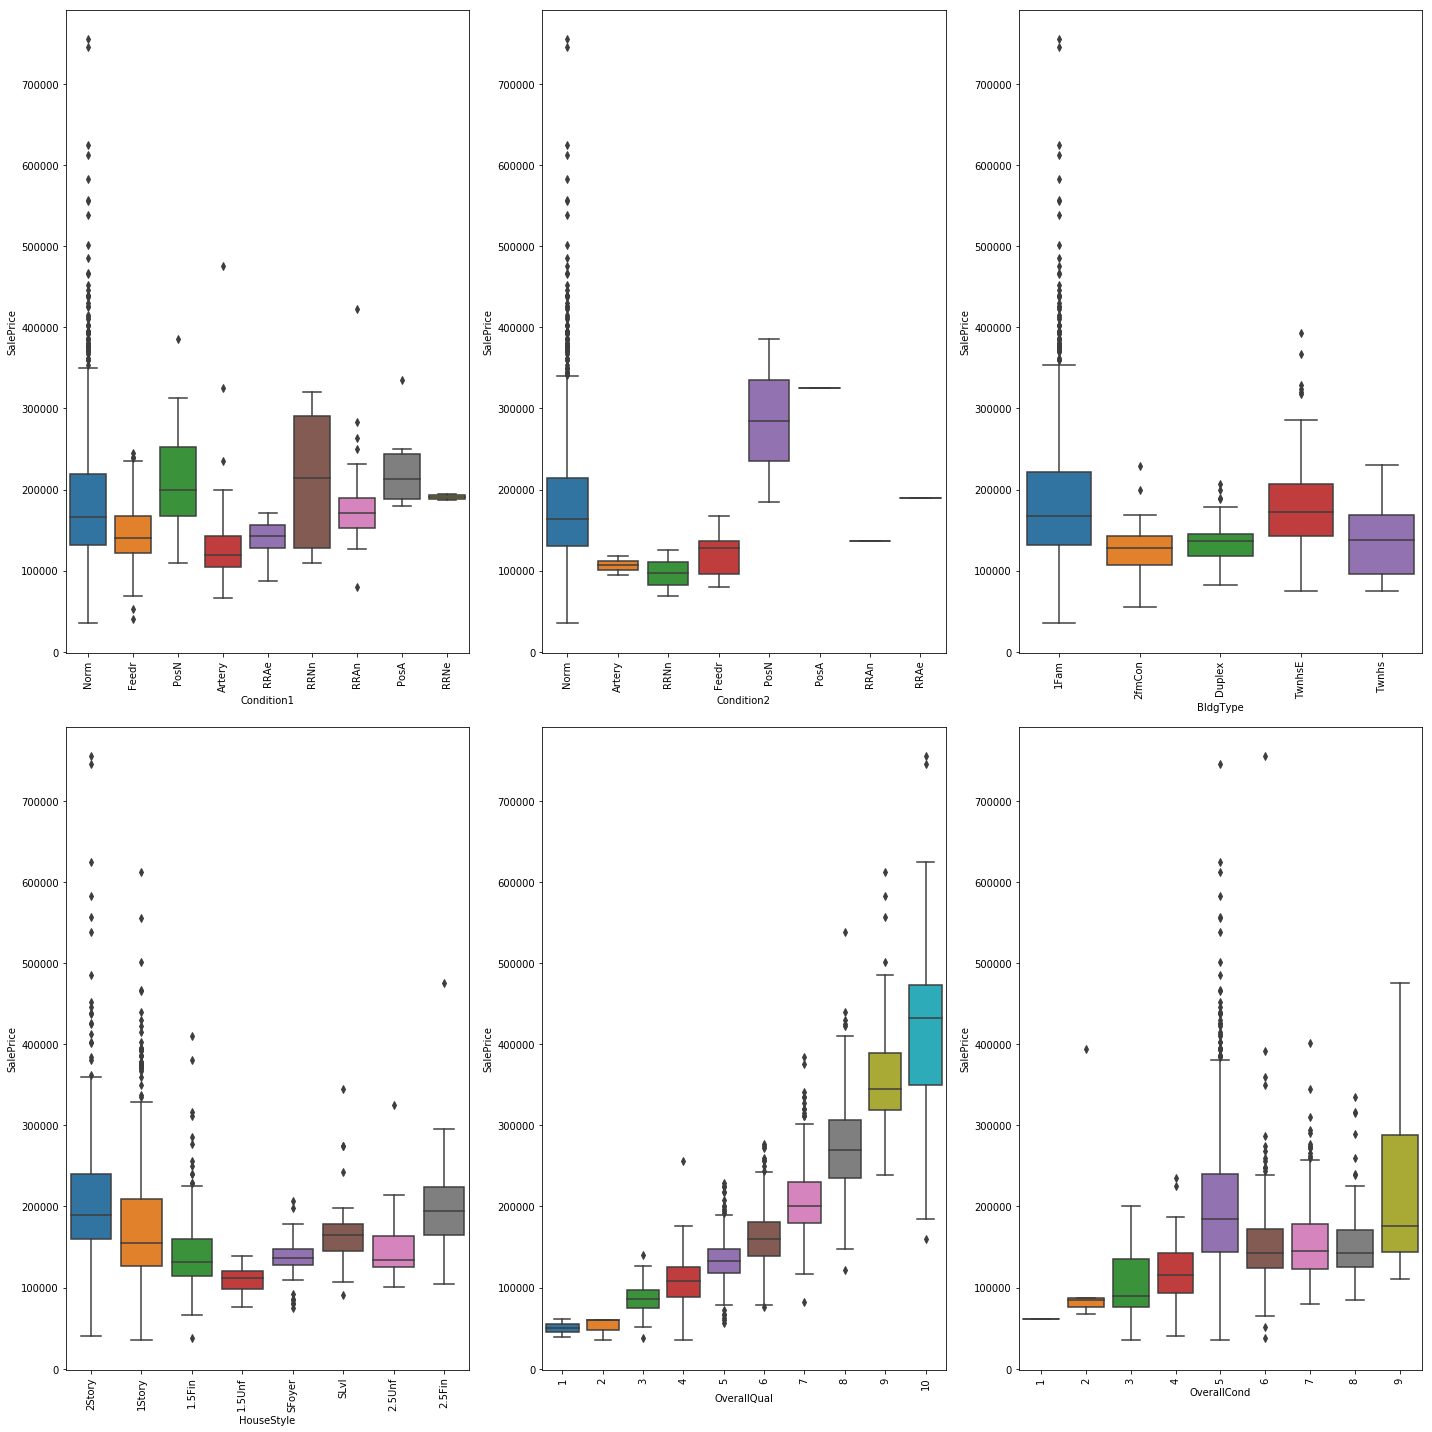

In [15]:
_check = ["Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond"]
j = 1

for i in _check:
    plt.subplot(2, 3, j)
    ax = sns.boxplot(data = train, x = i, y = "SalePrice")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#     plt.gca().xticks(rotation = 90)
    j+=1;
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.tight_layout()

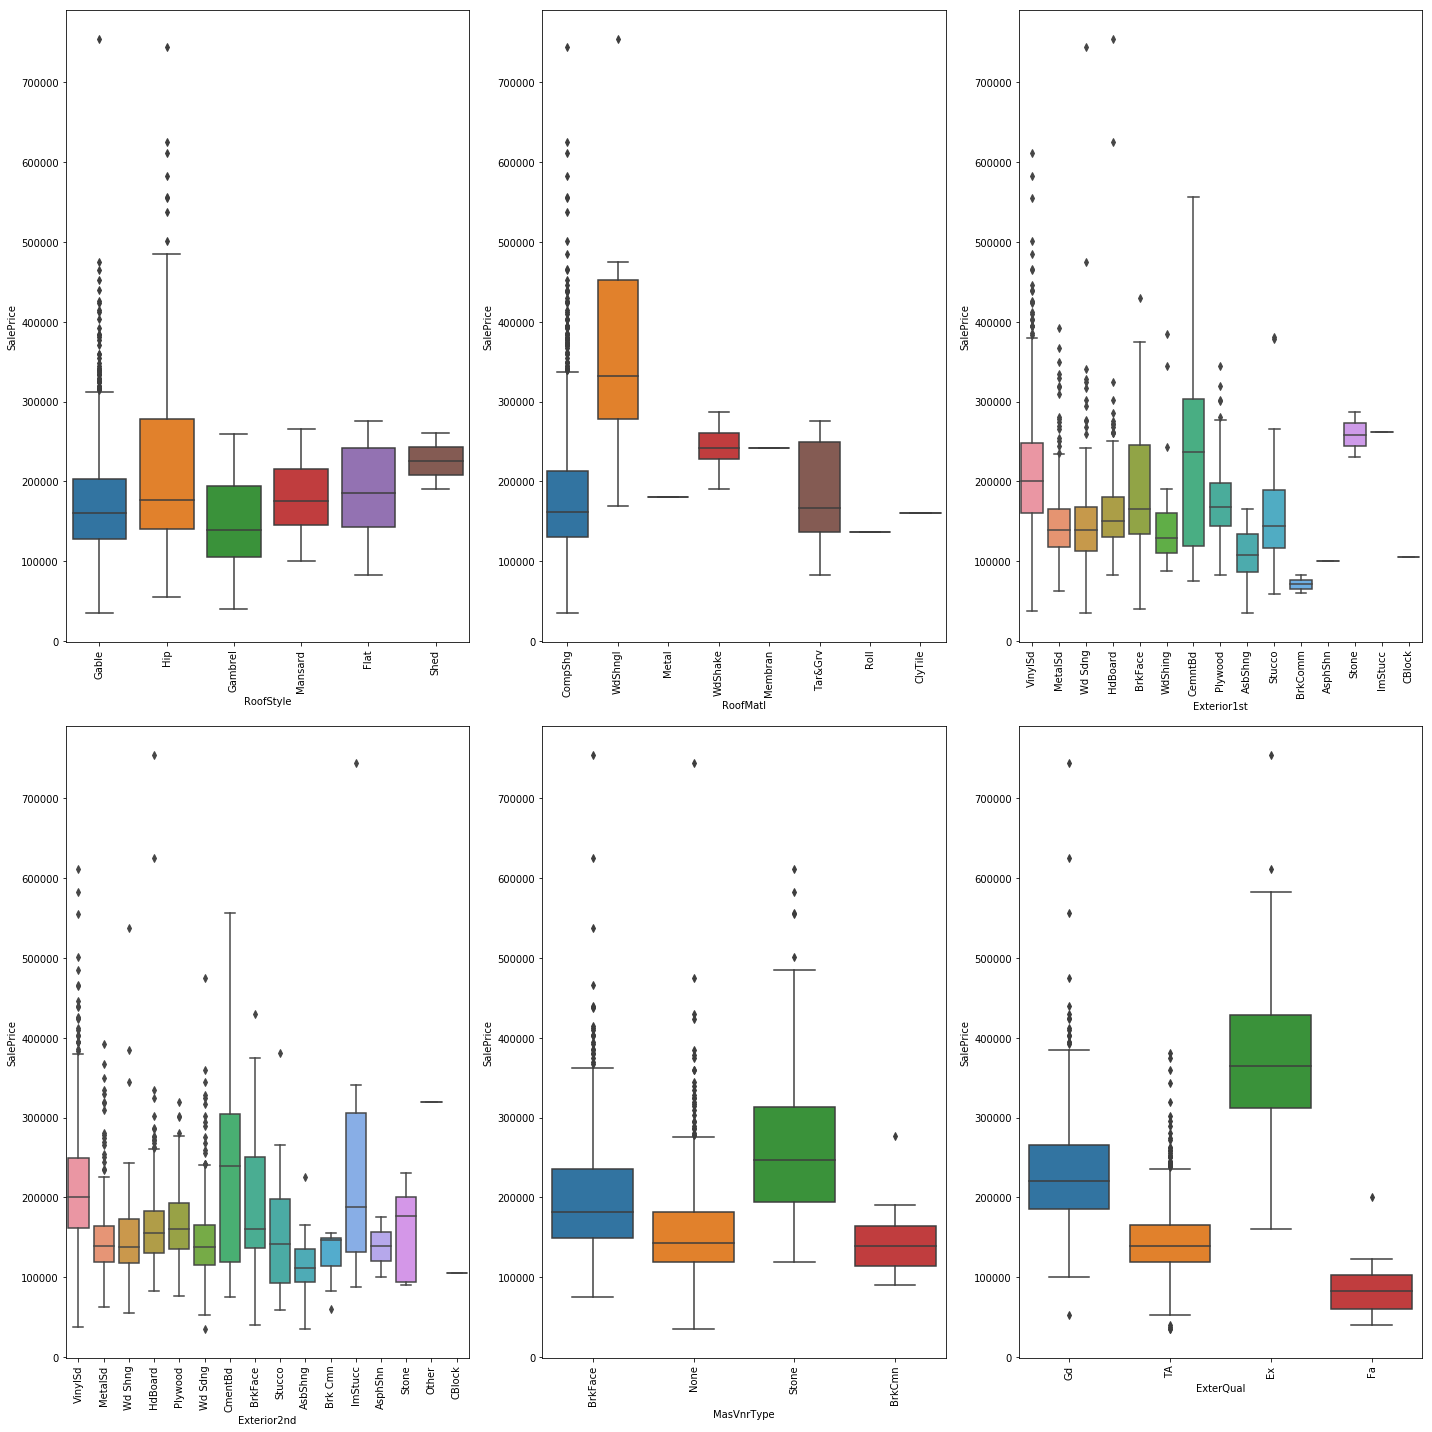

In [16]:
_check = ["RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual"]#, "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtFinSF2", "Heating", "HeatingQC", "CentralAir"]
j = 1

for i in _check:
    plt.subplot(2, 3, j)
    ax = sns.boxplot(data = train, x = i, y = "SalePrice")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#     plt.gca().xticks(rotation = 90)
    j+=1;
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.tight_layout()

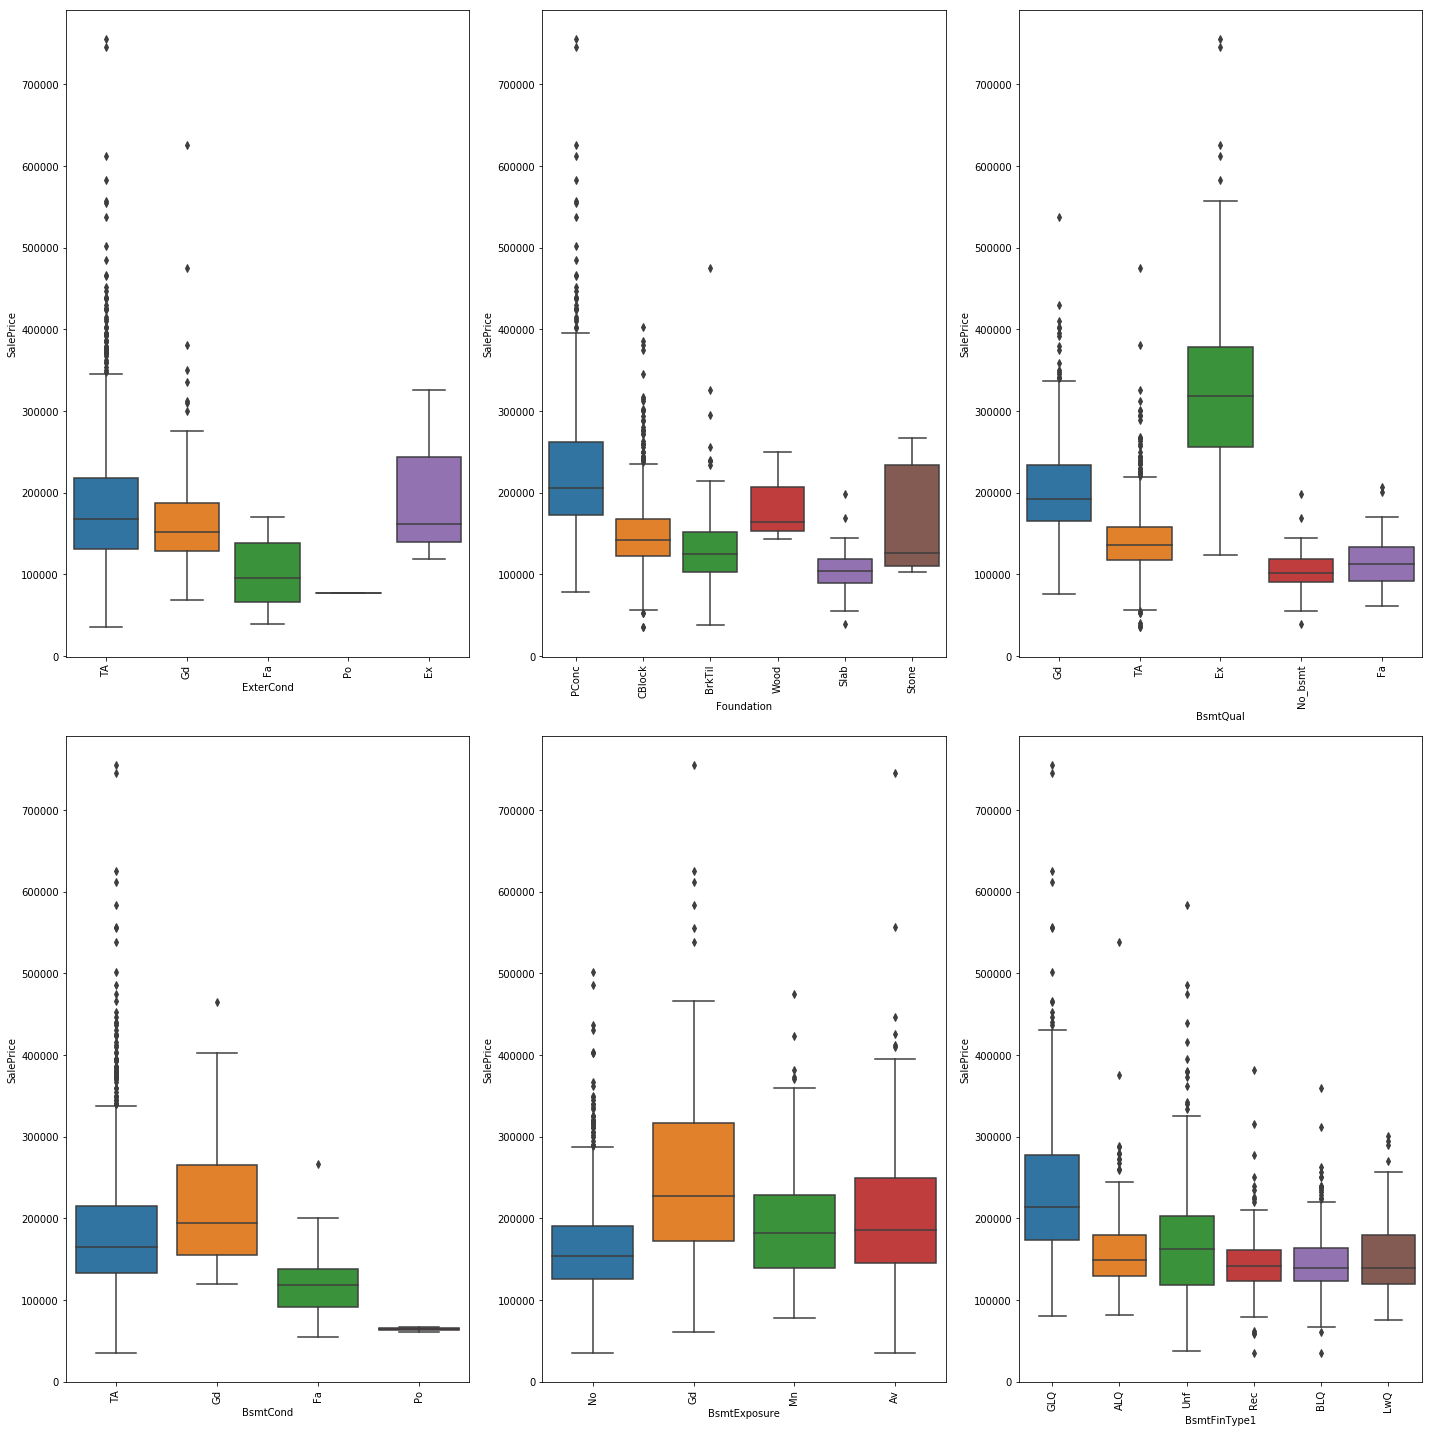

In [17]:
_check = ["ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1"]#, "BsmtFinType2", "BsmtFinSF2", "Heating", "HeatingQC", "CentralAir"]
j = 1

for i in _check:
    plt.subplot(2, 3, j)
    ax = sns.boxplot(data = train, x = i, y = "SalePrice")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#     plt.gca().xticks(rotation = 90)
    j+=1;
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.tight_layout()

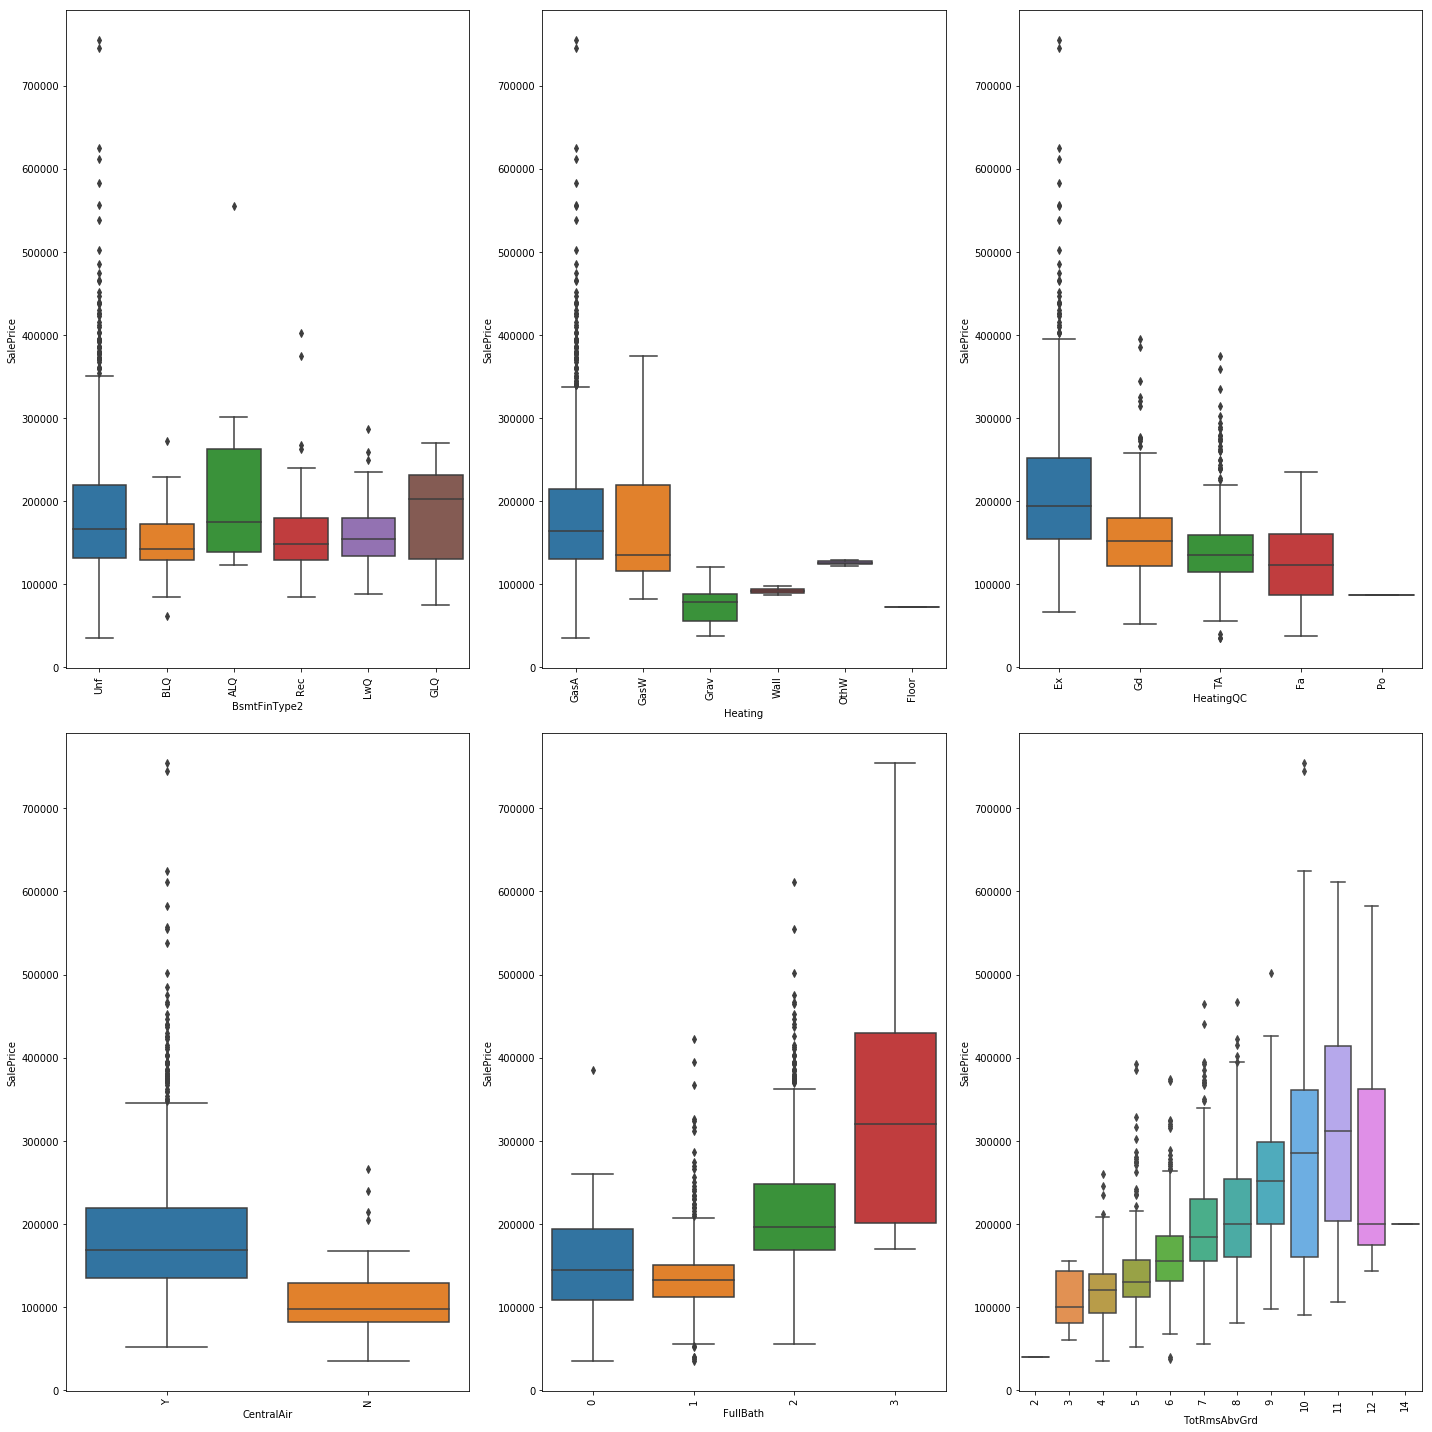

In [18]:
_check = [ "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "FullBath", "TotRmsAbvGrd"]
j = 1

for i in _check:
    plt.subplot(2, 3, j)
    ax = sns.boxplot(data = train, x = i, y = "SalePrice")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#     plt.gca().xticks(rotation = 90)
    j+=1;
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.tight_layout()

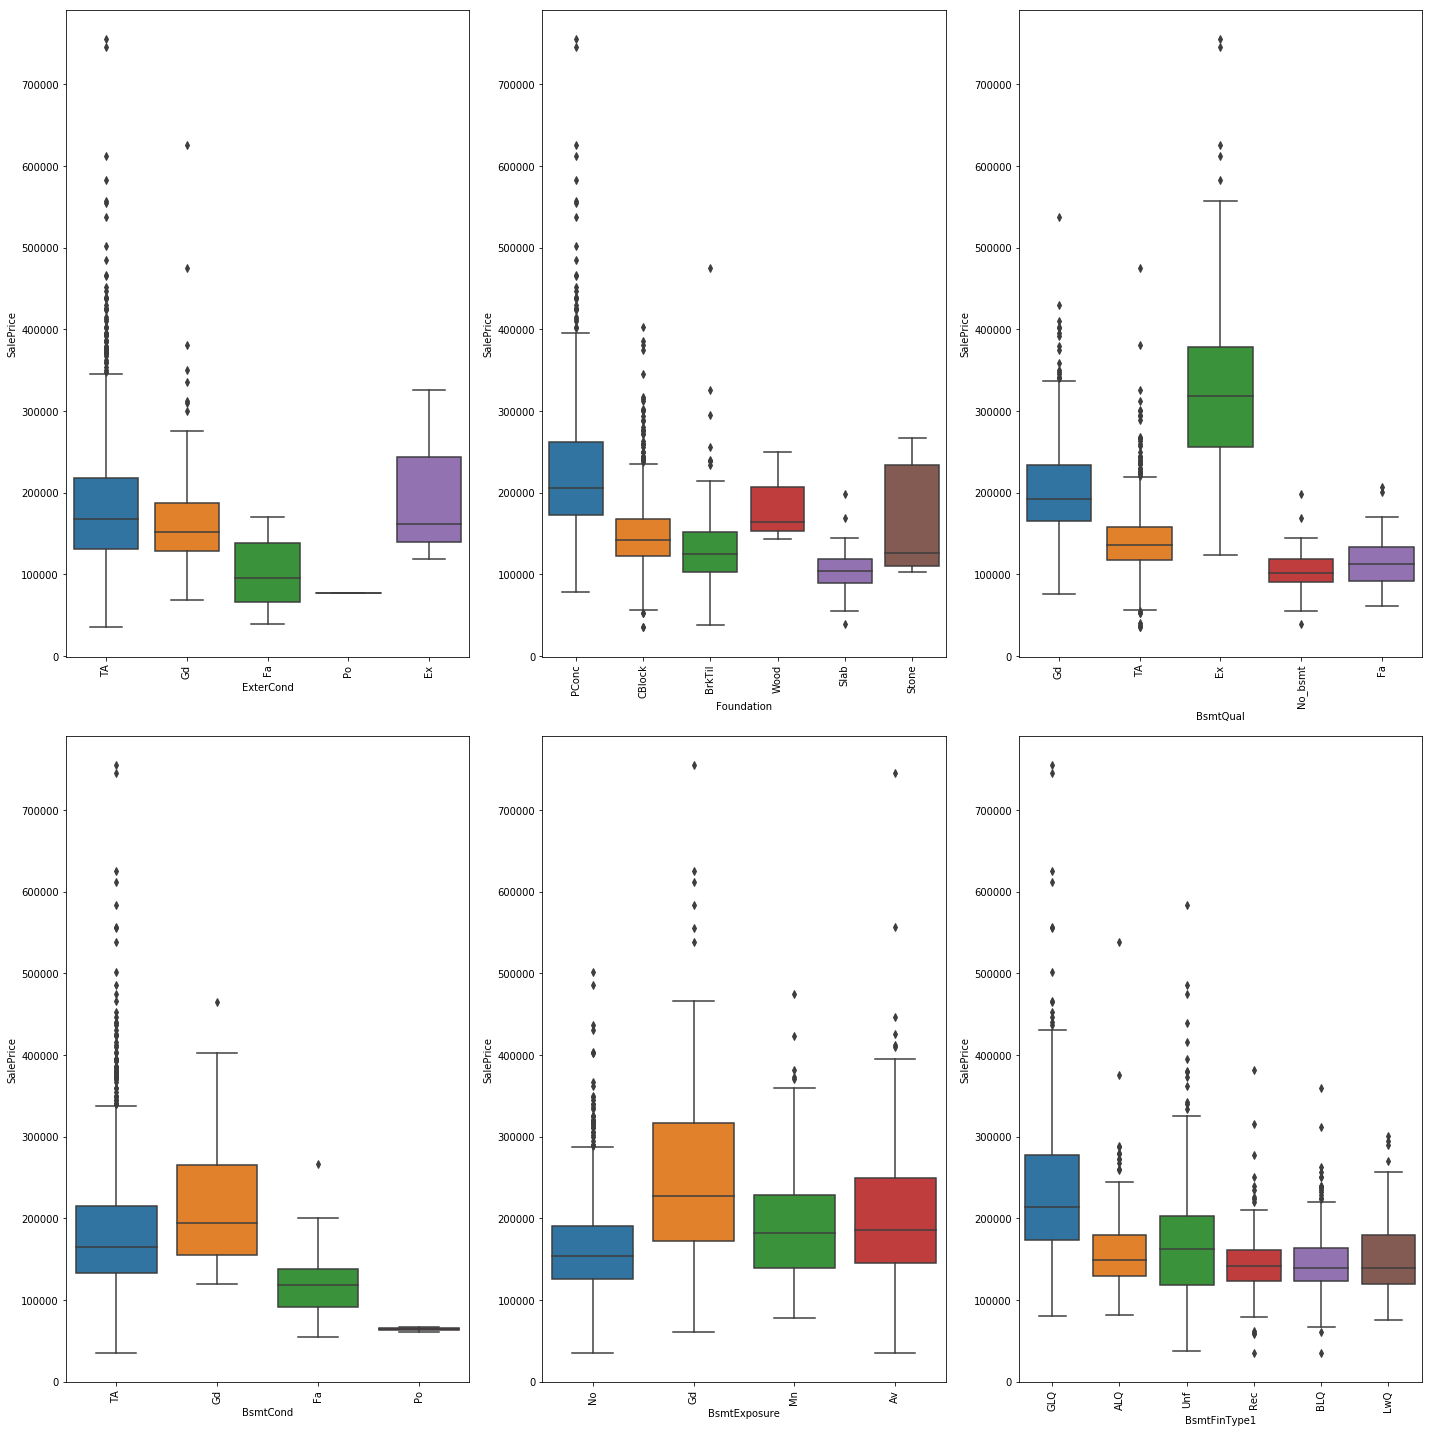

In [19]:
_check = ["ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1"]#, "BsmtFinType2", "BsmtFinSF2", "Heating", "HeatingQC", "CentralAir"]
j = 1

for i in _check:
    plt.subplot(2, 3, j)
    ax = sns.boxplot(data = train, x = i, y = "SalePrice")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#     plt.gca().xticks(rotation = 90)
    j+=1;
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.tight_layout()

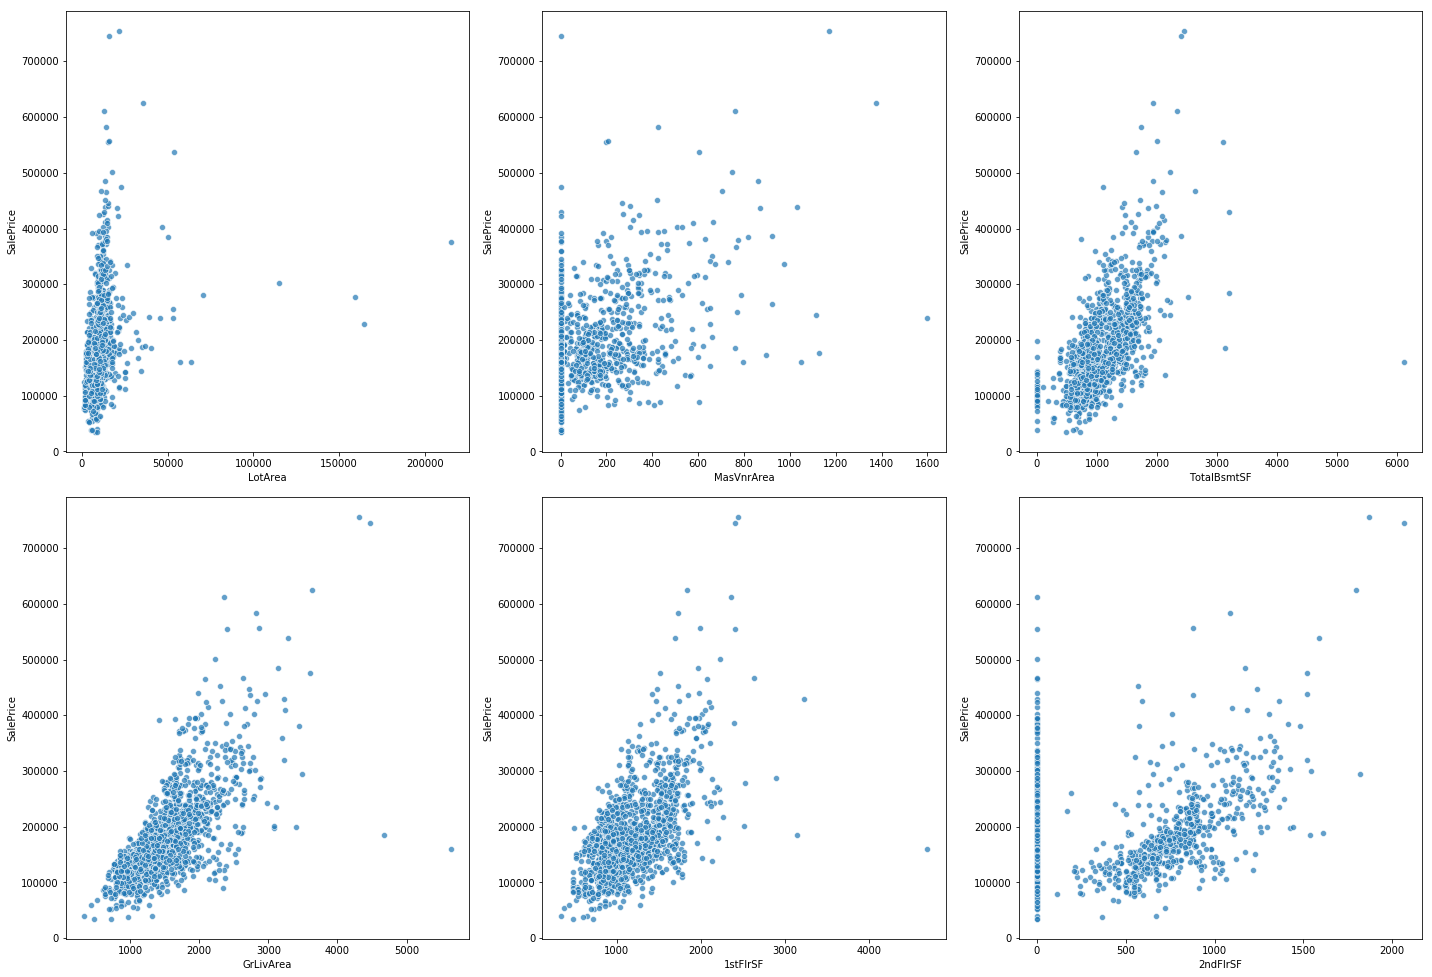

In [20]:

# sns.scatterplot(data = train, x = "LotArea",y = "SalePrice", alpha = 0.7)
_check = ["LotArea", "MasVnrArea", "TotalBsmtSF", "GrLivArea","1stFlrSF", "2ndFlrSF"]
# sns.distplot(train["BedroomAbvGr"])
j = 1
for i in _check:
    plt.subplot(3, 3, j)
    ax = sns.scatterplot(data = train, x = i,y = "SalePrice", alpha = 0.7)
#     ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#     plt.gca().xticks(rotation = 90)
    j+=1;
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.tight_layout()
# train["Bedrooms"]

## Encoding features

In [211]:
# dummy_features = []#"Fence", "GarageFinish"]#, "MiscFeature"]
# dummy = []
# for j in dummy_features:
#     for i in train[j].unique():
#         dummy.append(f"{j}_{i}")
# train = pd.get_dummies(train, columns=dummy_features)
# test = pd.get_dummies(test, columns = dummy_features)
# data = [train, test]

In [212]:
data = [train, test]

In [213]:
# sns.pairplot(data = train, hue = "hasPool", vars = ["SalePrice"], height = 5, aspect= 1.6, palette="husl")
# for i in data:
#     i["hasMas"] = 0
#     i.loc[i["MasVnrArea"]>0, "hasMas"] = 1

In [214]:
for i in data:
    i["hasBsmt"] = 0
    i.loc[i["TotalBsmtSF"]>0, "hasBsmt"]=1
    i["hasGarage"] = 0
    i.loc[i["GarageArea"]>0, "hasGarage"] = 1

In [215]:
# test["HouseStyle_2.5Fin"]=0

In [216]:
for i in data:
    i["hasSecondFloor"] = 0
    i.loc[i["2ndFlrSF"]>0, "hasSecondFloor"] = 1
#     i["hasFireplace"] = 0
#     i.loc[i["Fireplaces"]>0, "hasFireplace"] = 1

In [217]:
for i in data:
    i["Total_living_area"] = i["GrLivArea"] + i["TotalBsmtSF"]+i["GarageArea"]
    i["Age"] = i["YrSold"] - i["YearBuilt"]
    i["reAge"] = i["YrSold"]-i["YearRemodAdd"]
    i["TotalBath"] = i["FullBath"]+(i["HalfBath"]/2) + i["BsmtFullBath"] + (i["BsmtHalfBath"]/2)



In [218]:
total_features = []
total_features.append("LotArea")
# total_features.append("KitchenAbvGr")
# total_features.append("GrLivArea")
# total_features.append("TotalBsmtSF")
total_features.append("Total_living_area")
total_features.append("TotRmsAbvGrd")
total_features.append("hasBsmt")
total_features.append("hasSecondFloor")
# total_features.append("GarageCars")
total_features.append("hasGarage")
total_features.append("reAge")
# total_features.append("Age")
total_features.append("hasRemod")
total_features.append("TotalBath")
# total_features.append("GrLivArea")
# total_features.append("TotalPorchSF")
# total_features.append("GarageYrBlt")
total_features.append("OverallQual")
# total_features.append("WoodDeckSF")


# total_features.append("YrSold")
# total_features.append("MoSold")
# total_features.append("GarageType")
# for i in dummy:
#     total_features.append(i)
total_features

['LotArea',
 'Total_living_area',
 'TotRmsAbvGrd',
 'hasBsmt',
 'hasSecondFloor',
 'hasGarage',
 'reAge',
 'hasRemod',
 'TotalBath',
 'OverallQual']

In [219]:
x_train, x_test, y_train, y_test = train_test_split(train[total_features], train["SalePrice"], random_state = 1000)

In [242]:
regr = RandomForestRegressor(max_depth=5,random_state = 0, n_estimators = 5).fit(x_train, y_train)

In [243]:
regr.score(x_test, y_test)

0.8434032983922477

In [244]:
score = pd.DataFrame(y_test.copy(),  dtype='float64')
score = score.join(train,rsuffix = "_")
# train["SalePrice"]
score.reset_index(inplace=True)
score["PredictedPrice"] = pd.DataFrame(regr.predict(x_test))
# score.head()
score["logPredictedPrice"] = score["PredictedPrice"].apply(math.log)
score["logSalePrice"] = score["SalePrice"].apply(math.log)

In [245]:
# score.loc[:,["SalePrice", "PredictedPrice"]].apply(math.log)


# score.head()
# score["PredictedPrice"]
# math.log(10)
mean_squared_error(score["logSalePrice"], score["logPredictedPrice"])

0.02978642463590409

In [248]:
# train.head()
result= pd.DataFrame(test["Id"].copy(), columns = ['Id'])
result["SalePrice"] = pd.DataFrame(regr.predict(test[total_features]))
result.to_csv("house_price_submission_3.csv", index = False)
result.head()

,Id,SalePrice
0,1461,125839.476743
1,1462,164496.010560
2,1463,175959.750464
3,1464,183564.079372
4,1465,187640.892329


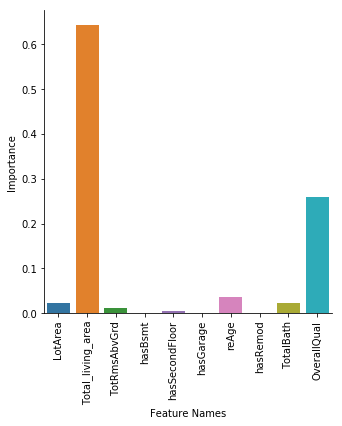

In [247]:
_features = pd.DataFrame(total_features, columns = ["Feature Names"])
_features["Importance"] = pd.DataFrame(list(regr.feature_importances_))
_features.sort_values("Importance", ascending = False)
sns.catplot(data = _features, x = "Feature Names", y = "Importance", kind ="bar").set_xticklabels(rotation=90)

In [226]:
# sns.catplot(data=train, x ="GarageCars", y ="SalePrice", kind ="box")
# train.loc[:, ["Exterior1st", "Exterior2nd"]]

# train["Dual_Exterior"] = train["Exterior1st"].copy()
# train.loc[train["Exterior1st"] != train["Exterior2nd"], "Dual_Exterior"] += " and " + train.loc[train["Exterior1st"]!=train["Exterior2nd"], "Exterior2nd" ]
# train["Exterior1st"]+" and " +train["Exterior2nd"]

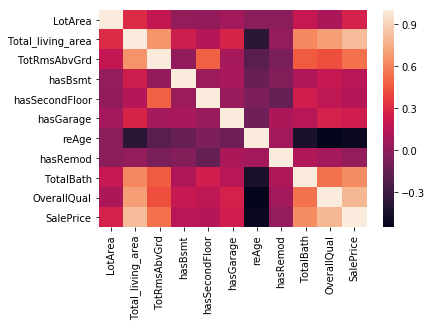

In [227]:
# sns.factorplot(data = train, x = "Neighborhood", kind = "count").set_xticklabels(rotation = 90)
# sns.relplot(data = train, x = "GarageCars", y = "SalePrice")
# sns.catplot(data = train, x = "MiscFeature", y = "SalePrice", kind= "box", height = 5, aspect = 2).set_xticklabels(rotation = 90)
k = total_features.copy()
k.append("SalePrice")
train.loc[:, k].corr()
sns.heatmap(train[k].corr())
# train[dummy_features].isnull().sum()

In [228]:
# test.loc[test["SaleType"].isnull(), ["SaleCondition"]
score["logResidual"] = score["logSalePrice"]-score["logPredictedPrice"]
score["Residual"] = score["SalePrice"]-score["PredictedPrice"]
score["abslogResidual"] = score["logResidual"].apply(math.fabs).copy()

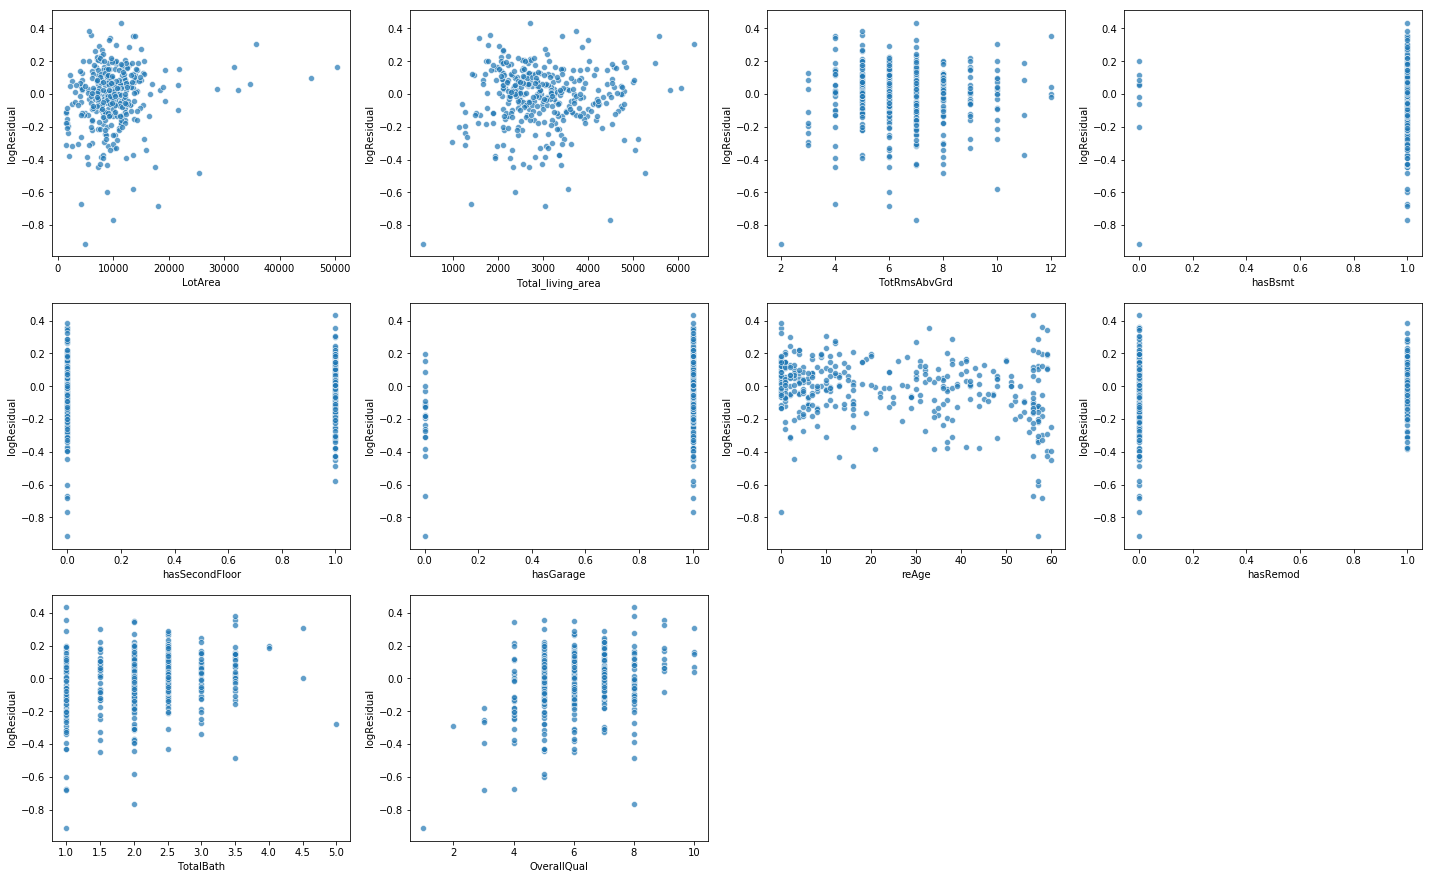

In [229]:
# sns.relplot(data = score, y = "logResidual", x="OverallQual")
# sns.catplot(data = train, x = "OverallQual", kind = "count")
j = 1
for i in total_features:
    plt.subplot(5, 4, j)
    ax = sns.scatterplot(data = score, x = i,y = "logResidual", alpha = 0.7)
#     ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#     plt.gca().xticks(rotation = 90)
    j+=1;
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.tight_layout()
# sns.relplot(data = score, y = "Residual", x="SalePrice")

C:\Users\Ashim\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


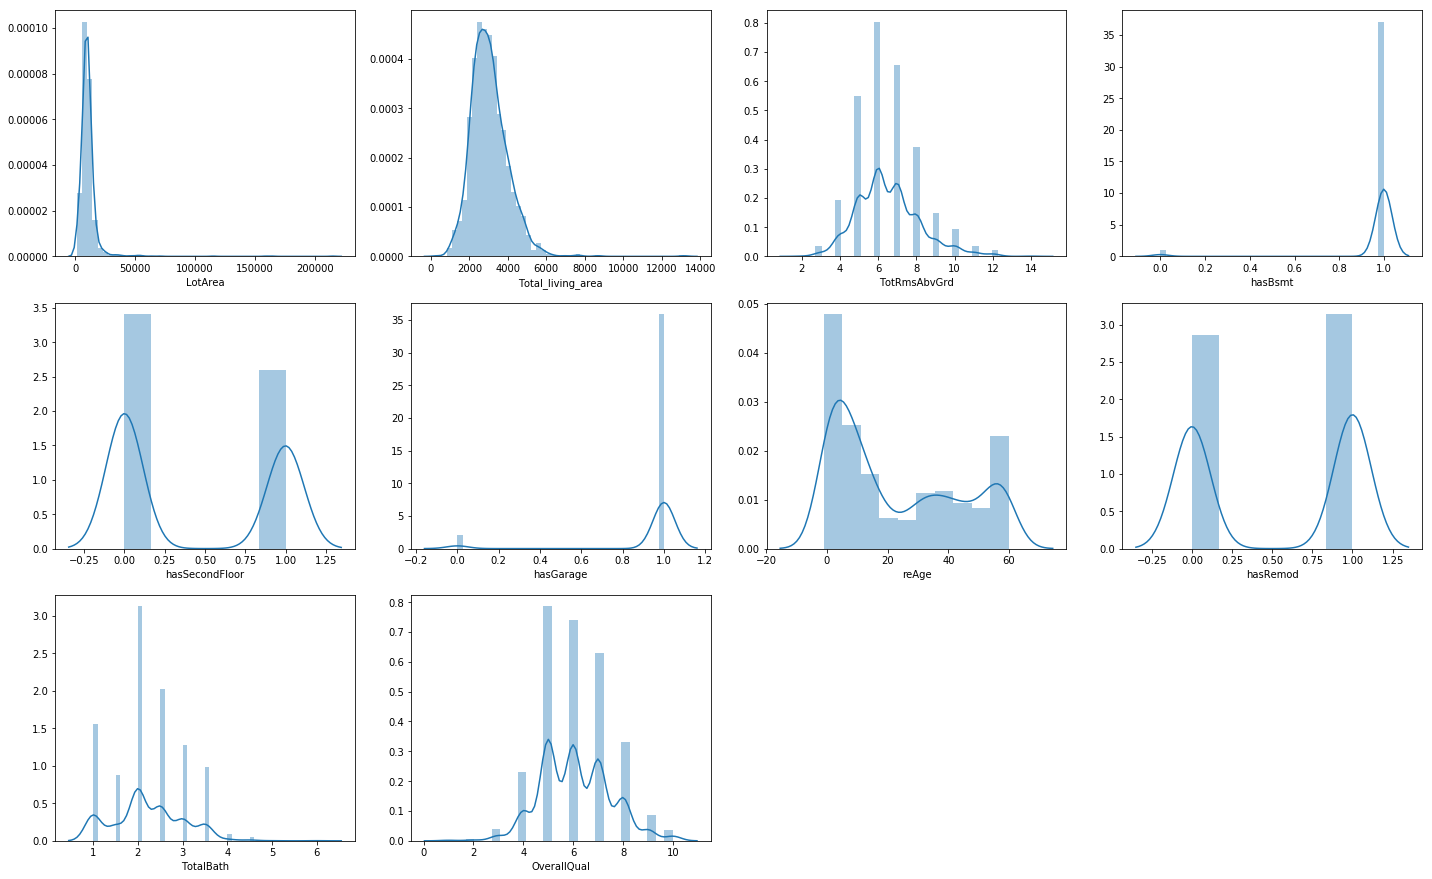

In [230]:
# train.loc[:20, ["1stFlrSF", "2ndFlrSF", "GrLivArea", "has2ndFloor"]]
j = 1
for i in total_features:
    plt.subplot(5, 4, j)
    ax = sns.distplot(train[i])
#     ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#     plt.gca().xticks(rotation = 90)
    j+=1;
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.tight_layout()

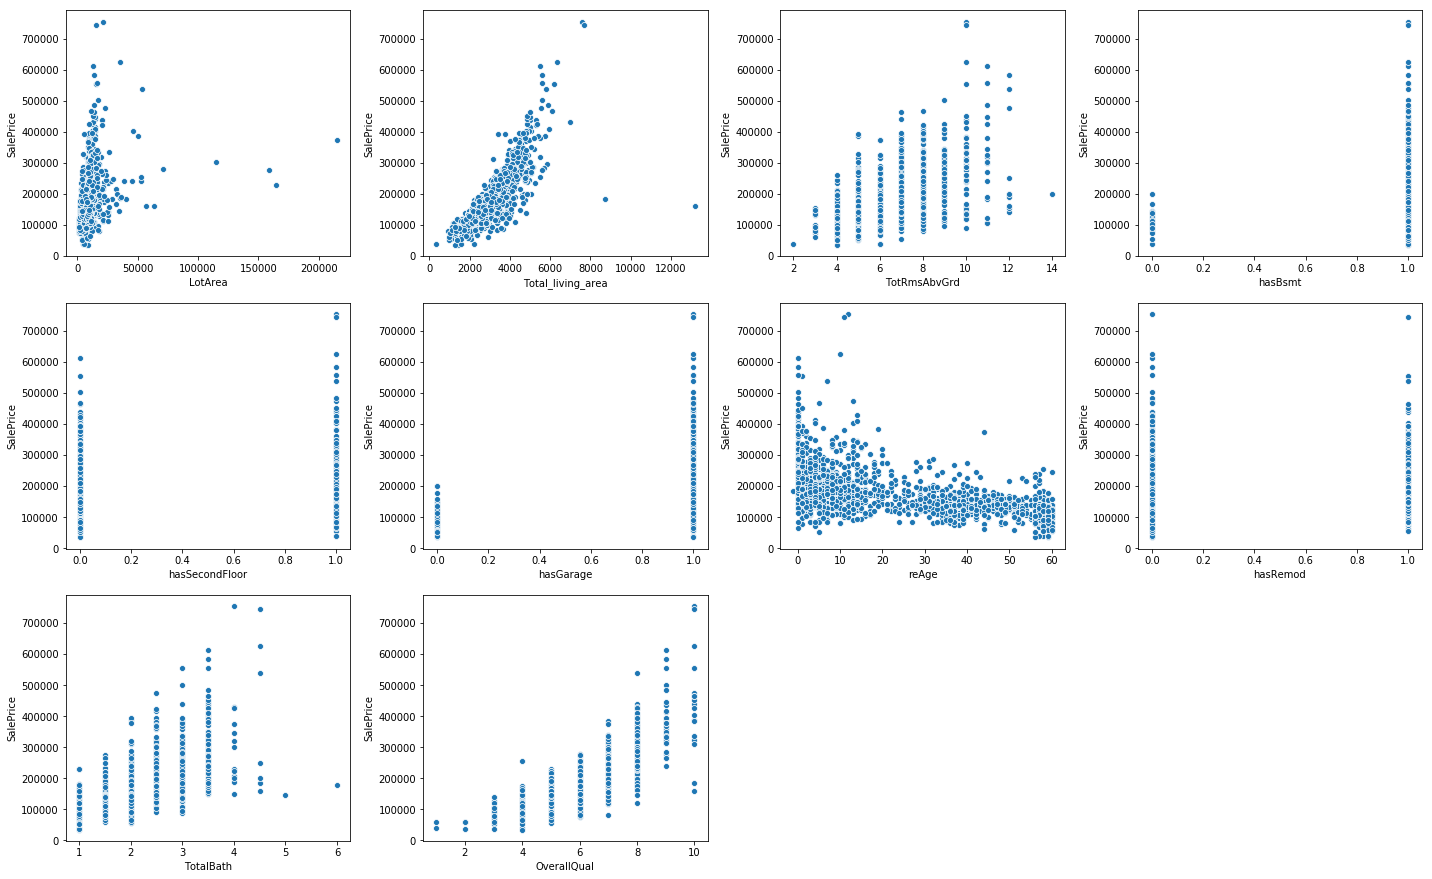

In [231]:
# train.loc[:20, ["1stFlrSF", "2ndFlrSF", "GrLivArea", "has2ndFloor"]]
j = 1
for i in total_features:
    plt.subplot(5, 4, j)
    ax = sns.scatterplot(data = train, x = i, y = "SalePrice")
#     ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#     plt.gca().xticks(rotation = 90)
    j+=1;
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.tight_layout()

In [164]:
train["reAge"] = train["YrSold"] - train["YearRemodAdd"]
train.loc[:20, ["YearRemodAdd", "YrSold", "reAge"]]

,YearRemodAdd,YrSold,reAge
0,2003,2008,5
1,1976,2007,31
2,2002,2008,6
3,1970,2006,36
4,2000,2008,8
5,1995,2009,14
6,2005,2007,2
7,1973,2009,36
8,1950,2008,58
9,1950,2008,58


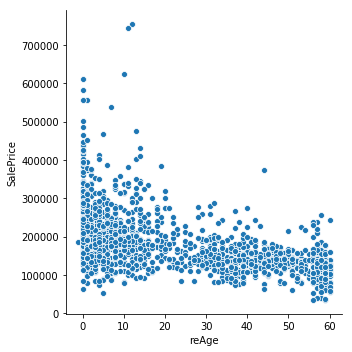

In [165]:
# sns.distplot(train["Age"])
sns.relplot(data = train, x = "reAge", y = "SalePrice")

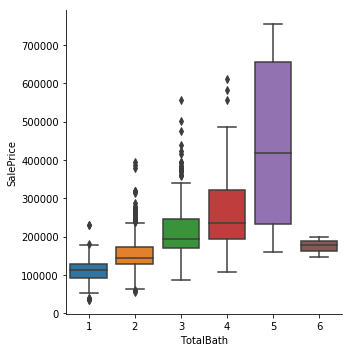

In [239]:
# sns.catplot(data = train, x = "hasBsmt", kind = "count")
# train["FullBath", "HalfBath"]
train["TotalBath"] = train["FullBath"]+(train["HalfBath"]) + train["BsmtFullBath"] + (train["BsmtHalfBath"])
sns.catplot(data = train, x = "TotalBath", y = "SalePrice", kind = "box")

In [198]:
test.loc[test["BsmtFullBath"].isnull(), ["BsmtQual"]]

,BsmtQual
660,No_bsmt
728,No_bsmt
